# Project : In-vehicle coupon recommendation 
---

### Name : Kant Charoensedtasin (Gun)

---
## 1. Problem statement 
The company want to improve coupon strategy for increasing revenue of local business  


## 2. Objective
1. Increase number of customer for local business by giving coupon (Assumption : Revenue raise when coupon is accepted)
2. Increase number of %accepted coupon

## 3. Hypothesis-driven Questions
1. What are top numerical features affected to accepted coupon?
2. What type of people trend to accept coupon?
3. What kind of behavior/environment affect to accepted coupon?
4. What type of coupon is the most popular?
5. How environment/behavior affect to type of accepted coupon?


## 4. Dataset :  [In-vehicle coupon recommendation](https://www.kaggle.com/datasets/mathurinache/invehicle-coupon-recommendation)
### 4.1 Dataset information : 
The dataset was retrieved from Kaggle. The data from this dataset was collected via a survey on Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. 
### 4.2 Feature information :
- **destination**: No Urgent Place, Home, Work
- **passanger**: Alone, Friend(s), Kid(s), Partner (who are the passengers in the car)
- **weather**: Sunny, Rainy, Snowy
- **temperature**: 55, 80, 30
- **time**: 2PM, 10AM, 6PM, 7AM, 10PM
- **coupon**: Restaurant(\$\<20), Coffee house, Carry out & Take away, Bar, Restaurant(\\$20-\\$50)
- **expiration** : 1d, 2h (the coupon expires in 1 day or in 2 hours)
- **gender**: Female, Male
- **age**: 21, 46, 26, 31, 41, 50plus, 36, below21
- **maritalStatus**: Unmarried partner, Single, Married partner, Divorced, Widowed
- **hasChildren**:1, 0 
- **education**: Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School 
- **occupation**: Unemployed, Architecture & Engineering, Student, Education&Training&Library, Healthcare Support, Healthcare Practitioners & Technical, Sales & Related, Management, Arts Design Entertainment Sports & Media, Computer & Mathematical, Life Physical Social Science, Personal Care & Service, Community & Social Services, Office & Administrative Support, Construction & Extraction, Legal, Retired, Installation Maintenance & Repair, Transportation & Material Moving, Business & Financial, Protective Service, Food Preparation & Serving Related, Production Occupations, Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry
-**income**: \\$37500 - \\$49999, \\$62500 - \\$74999, \\$12500 - \\$24999, \\$75000 - \\$87499, \\$50000 - \\$62499, \\$25000 - \\$37499, \\$100000 or More, \\$87500 - \\$99999, Less than \\$12500
- **Car** : Car type
- **Bar**: never, less1, 1\~3, 4\~8, gt8 (feature meaning: how many times do you go to a bar every month?)
- **CoffeeHouse**: never, less1, 1\~3, 4\~8, gt8 (feature meaning: how many times do you go to a coffeehouse every month?)
- **CarryAway**: never, less1, 1\~3, 4\~8, gt8 (feature meaning: how many times do you get take-away food every month?)
- **RestaurantLessThan20** : never, less1, 1\~3, 4\~8, gt8 (feature meaning: how many times do you go to a restaurant with an average expense per person of less than \\$20 every month?)
- **Restaurant20To50**: never, less1, 1\~3, 4\~8, gt8 (feature meaning: how many times do you go to a restaurant with average expense per person of \\$20 - \\$50 every month?)
- **toCoupon_GEQ5min**: 0,1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 5 minutes)
- **toCouponGEQ15min**: 0,1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 15 minutes)
- **toCouponGEQ25min**: 0, 1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 25 minutes)
- **directionsame**: 0, 1 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)
- **direction_opp**: 1, 0 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)
- **Y**: 1, 0 (whether the coupon is accepted)

**Note** - In this project, we define Bar, CoffeeHouse, CarryAway, RestaurantLessThan20 and Restaurant20To50 column as 'frequency column/feature'.

## 5. Data prepareation (Cleaning data)
First, we need to import package that used to handle this dataset. The dataset is collected in dataframe type in df variable

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None #Deal with SettingWithCopyWarning in Pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('Set1')
df_original = pd.read_csv('in-vehicle-coupon-recommendation.csv')
df = df_original.copy() #Copy dataframe for working

Next step, we scan the dataset  and identify how to handle this dataset 

In [2]:
# Look at the sample of dataset by using .head()
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
# Look at the sample of dataset by using .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [4]:
# Identify the size of dataset
print(f"This dataset contain data {df.shape[0]} rows and {df.shape[1]} columns")

This dataset contain data 12684 rows and 26 columns


Before we are going to clean the data, we must decide how to handle the missing data in the dataset by looking into the data.

In [5]:
# Identify column with null value
null_df = pd.DataFrame(df.isna().sum(),columns = ["Null_Value"])
null_df.index.name = 'Column'
Total_null = null_df.sort_values(['Null_Value'],ascending = False).head(8)
print(Total_null)

                      Null_Value
Column                          
car                        12576
CoffeeHouse                  217
Restaurant20To50             189
CarryAway                    151
RestaurantLessThan20         130
Bar                          107
destination                    0
passanger                      0


In [6]:
# Calculate % of missing data
List_null = list(Total_null['Null_Value']) #Convert to list to avoid print dtype of the data
print(f'Total percent of missing value in car columns : {round(List_null[0]/df.shape[0]*100,1)} %')
print(f'Total row of missing value in frequency column : {sum(List_null[1:6])} rows') 

Total percent of missing value in car columns : 99.1 %
Total row of missing value in frequency column : 794 rows


From result, i decide to drop the "car" columns because missing value in the column is about 99% of that data. For the missing value in frequency column, we try to drop it and check amount of dropped rows(accept at lower than 5%).

In [7]:
df.drop(columns = ['car'],inplace = True)
print(f"Drop missing value = {round((1 - df.dropna().shape[0]/df.shape[0])*100,2)} % of data")

Drop missing value = 4.77 % of data


Next step, we can drop all of missing value in df(frequency columns) and then store the data in df_clean dataframe.

In [8]:
df_clean = df.dropna() #All remaining missing value is in frequency column
print(f"This cleaned dataset contain data {df_clean.shape[0]} rows and {df_clean.shape[1]} columns")

This cleaned dataset contain data 12079 rows and 25 columns


## 6. Data exploration
The previous section is cleaning dataset in order to analyze the insight of the data. In this project, we will analyze insight data by using only vitualization.

First, we need to understand the whole dataset. In this project, feature "Y" is label which is the most important feature. The feature "Y" has 2 values such as "1" and "0". (Y = "1" : the driver accept coupon, Y = "0" : the driver unaccept coupon)

Before we are going to analyze the dataset for the objective, we need to adjust the data that ready for analysis.

In [9]:
for column in df_clean.columns:
    print("Feature :",column)
    print("Feature has", df[column].nunique(), "unique values")
    print(df[column].value_counts())
    print("-------------------------------")

Feature : destination
Feature has 3 unique values
No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64
-------------------------------
Feature : passanger
Feature has 4 unique values
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: int64
-------------------------------
Feature : weather
Feature has 3 unique values
Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64
-------------------------------
Feature : temperature
Feature has 3 unique values
80    6528
55    3840
30    2316
Name: temperature, dtype: int64
-------------------------------
Feature : time
Feature has 5 unique values
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: time, dtype: int64
-------------------------------
Feature : coupon
Feature has 5 unique values
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Rest

### 6.1 Analysis numerical data
We can find the relation between feature by using correlation. In order to using correlation, we need to convert type of nominal data in some feature to numberical data. From data exploration above, I decide to convert nominal data from expiration, age, and frequency feature to ordinal number.

In [10]:
#Change text to ordinal number
#Feature : expiration
expiration_dict = {
    '2h' : 1,
    '1d' : 2 #Longer duration of coupon
}
#Feature : age
age_dict = {
    'below21' :  0,
    '21'      :  1,
    '26'      :  2,
    '31'      :  3,
    '36'      :  4,
    '41'      :  5,
    '46'      :  6,
    '50plus'  :  7,
}
#Feature : income
income_dict ={
    'Less than $12500' : 0,
    '$12500 - $24999'  : 1,
    '$25000 - $37499'  : 2,
    '$37500 - $49999'  : 3,
    '$50000 - $62499'  : 4,
    '$62500 - $74999'  : 5,
    '$75000 - $87499'  : 6,
    '$87500 - $99999'  : 7,
    '$100000 or More'  : 8 
}
#Frequency feature : Bar, CoffeHouse, CarryAway, RestaurantLessThan20 and Restaurant20To50 (same value)
freq_dict = {
    'never' : 0,
    'less1' : 1,
    '1~3'   : 2,
    '4~8'   : 3,
    'gt8'   : 4
}
#Replace value in dataframe with ordinal value
df_clean.loc[:,'expiration'] = df_clean.loc[:,'expiration'].map(expiration_dict)
df_clean.loc[:,'age'] = df_clean.loc[:,'age'].map(age_dict)
df_clean.loc[:,'income'] = df_clean.loc[:,'income'].map(income_dict)
freq_feature = ['Bar','CoffeeHouse', 'CarryAway', 'RestaurantLessThan20','Restaurant20To50']
for feature in freq_feature:
    df_clean.loc[:,feature] = df_clean.loc[:,feature].map(freq_dict)

In [11]:
df_clean.head() #Check the result after convert categorical to numerical data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),2,Male,1,Single,...,1,3,3,1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,1,Male,1,Single,...,1,3,3,1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,2,Male,1,Single,...,1,3,3,1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,1,Male,1,Single,...,1,3,3,1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2,Male,1,Single,...,1,3,3,1,1,0,0,0,1,0


Another set of data (toCoupon_GEQ5min,toCoupon_GEQ15min and toCoupon_GEQ25min) in this dataset is the driving distant to restaurant using the coupon. It's hard to understand if we determine this 3 feature separately. Then we can convert 3 feature to ordinal number in new column name 'dist'. The dist column explain about current location and using coupon shop.

In [12]:
df_clean['dist'] = None
df_clean.loc[df['toCoupon_GEQ15min'] == 0,['dist']] = 0 #Dist = 0 means Distant between current location and using coupon is 5 min
df_clean.loc[(df['toCoupon_GEQ15min'] == 1) & (df['toCoupon_GEQ25min'] == 0),['dist']] = 1 #Dist = 1 : 15 - 25 min
df_clean.loc[(df['toCoupon_GEQ15min'] == 1) & (df['toCoupon_GEQ25min'] == 1),['dist']] = 2 #Dist = 2 : 25 min+
#Convert type of column 'dist' to int64 for calculating correlation
df_clean['dist'] = df_clean['dist'].astype('int64')

In [13]:
#Then drop 'toCoupon_GEQ5min','toCoupon_GEQ15min' and 'toCoupon_GEQ25min' feature
df_clean.drop(columns = ['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min'],inplace = True)
df_clean.info() # Check feature and type in dataframe after tranforming

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  int64 
 7   gender                12079 non-null  object
 8   age                   12079 non-null  int64 
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  int64 
 14  Bar                   12079 non-null  int64 
 15  CoffeeHouse           12079 non-nul

Next step, Let's caluculate the correlation between feature by using .corr() method and plot heatmap for represent correlation matrix.

In [14]:
df_clean.corr()

,temperature,expiration,age,has_children,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,direction_opp,Y,dist
temperature,1.000000,-0.125889,-0.013803,-0.020674,-0.026463,0.002075,-0.016783,0.012090,0.031073,-0.027650,0.097539,-0.097539,0.056646,-0.218121
expiration,-0.125889,1.000000,-0.020323,-0.018086,-0.018334,-0.009886,-0.003630,0.001379,-0.013255,-0.004020,-0.034709,0.034709,0.133131,-0.016266
age,-0.013803,-0.020323,1.000000,0.438281,0.078848,-0.162189,-0.052585,-0.062051,0.002981,0.000555,-0.031232,0.031232,-0.057399,0.029585
has_children,-0.020674,-0.018086,0.438281,1.000000,0.098848,-0.205094,0.036041,-0.065068,-0.033423,-0.010207,-0.033047,0.033047,-0.048333,0.051846
income,-0.026463,-0.018334,0.078848,0.098848,1.000000,0.042983,-0.020616,0.025463,0.109281,0.167148,-0.025300,0.025300,-0.028862,0.013057
Bar,0.002075,-0.009886,-0.162189,-0.205094,0.042983,1.000000,0.252088,0.197706,0.158937,0.276557,-0.002573,0.002573,0.072649,-0.019767
CoffeeHouse,-0.016783,-0.003630,-0.052585,0.036041,-0.020616,0.252088,1.000000,0.224194,0.304643,0.246870,-0.005211,0.005211,0.112868,-0.003220
CarryAway,0.012090,0.001379,-0.062051,-0.065068,0.025463,0.197706,0.224194,1.000000,0.405206,0.178708,-0.003445,0.003445,0.036913,-0.010069
RestaurantLessThan20,0.031073,-0.013255,0.002981,-0.033423,0.109281,0.158937,0.304643,0.405206,1.000000,0.405207,-0.010125,0.010125,0.037051,-0.013754
Restaurant20To50,-0.027650,-0.004020,0.000555,-0.010207,0.167148,0.276557,0.246870,0.178708,0.405207,1.000000,-0.008713,0.008713,0.073151,-0.013077


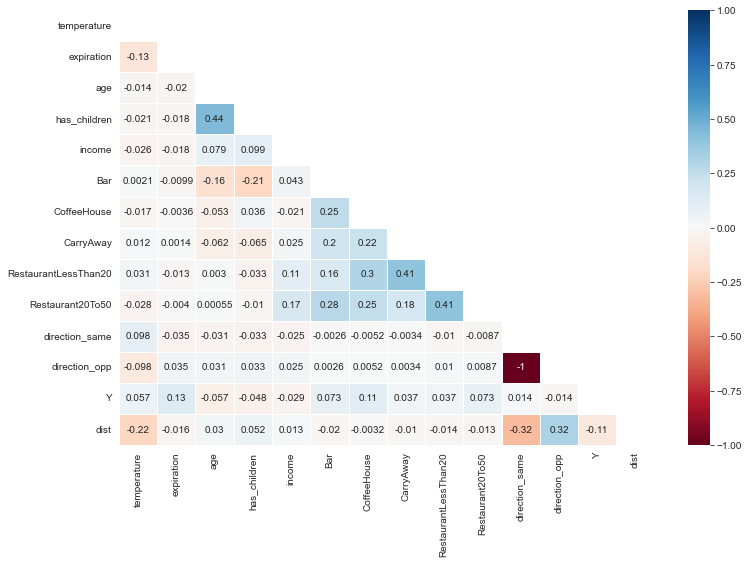

In [15]:
# Using heatmap method from seaborn to plot the heatmap
plt.subplots(figsize = (12,8))
mask = np.triu(np.ones_like(df_clean.corr(), dtype=bool)) # Upper triangle is True
heatmap = sns.heatmap(df_clean.corr(),annot = True,cmap= 'RdBu',mask = mask, vmin = -1, vmax = 1, linewidths=.5);

After using heatmap, we slightly see the difference of the correlation because correlation between Y and other variable are low.  The correlation between 'direction_same' and 'direction_opp' is -1 which mean they have perfect negative correlation. Then, we can drop 1 of this feature.

In [16]:
df_clean.drop(columns = ['direction_opp'],inplace = True)

Let's focus only correlation between accepted coupon and the other.

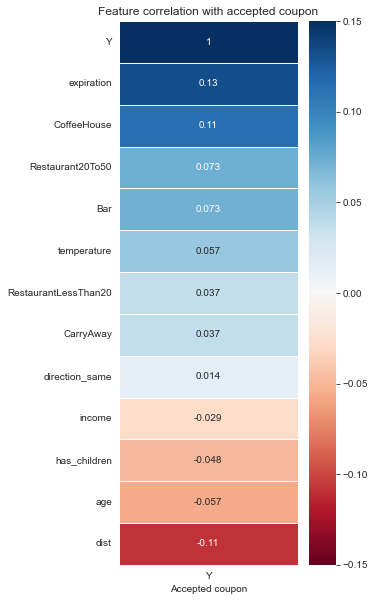

In [17]:
#Select only column 'Y' in correlation dataframe and adjust the color range in heatmap
plt.figure(figsize= (4,10))
accept_corr = sns.heatmap(df_clean.corr()[['Y']].sort_values('Y',ascending = False),annot = True,cmap = 'RdBu',vmax = 0.15,vmin = -0.15, linewidths=.5)
accept_corr.set_title('Feature correlation with accepted coupon')
accept_corr.set(xlabel = 'Accepted coupon');

As the result of the analysis in the first part, there are 3 features that have correlation with accepted coupon greater than 0.1 e.g. expiration, Coffee House, and distant. This 3 feature affect to the accepted coupon more than the others. The expiration feature has positive correlation with accepted coupon which means the duration of coupon affect the accepted coupon in the same direction. In contrast, distant feature has negative correlation with accepted coupon. Distant between current location affect to accepted coupon in the opposite direction.

### 6.2 Analysis categorical data
There are 9 features that contain categorical data. We require to analyze by plotting graph separately. In this section, we analyze separate into 2 section. The First section is relation between accepted coupon and categorical feature. The second is relation between type of coupon and selected categorical feature from the first section.

In [18]:
#Check balancing data of accepted/unaccepted coupon
accept_coupon_df = df_clean[df_clean['Y'] == 1]
unaccept_coupon_df = df_clean[df_clean['Y'] == 0]
print(f'accepted coupon   : {accept_coupon_df.shape[0]} ({round(accept_coupon_df.shape[0]/df_clean.shape[0]*100,1)}%)')
print(f'unaccepted coupon : {unaccept_coupon_df.shape[0]} ({round(unaccept_coupon_df.shape[0]/df_clean.shape[0]*100,1)}%)')

accepted coupon   : 6877 (56.9%)
unaccepted coupon : 5202 (43.1%)


In [19]:
# Using countplot from seaborn library to display the relation between variable and count
def plot_coupon(df,column,ax = None,order = None,rotation = 0,title = None):
    """ plot_coupon function is used for plotting countplot(seaborn) between accepted coupon and feature
    
        parameter
        ---------
        df : dataframe using in this function
        ax : axes that indicate the position in subplot (default = None)
        order : list of xticks order (default = None)
        rotation : rotate xtick  (default = 0)
        title : title of the graph (default = None)
    """
    plot = sns.countplot(x = column,hue = 'Y',data = df,order = order ,ax = ax)
    for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+15),ha = 'center')
    plot.set(xlabel = None) # Remove x label
    plot.set_xticklabels(plot.get_xticklabels(),rotation = rotation)
    plot.legend(labels = ['No','Yes'],title = 'Accept coupon')
    if title == None : 
        plot.set(title = column)
    else :
        plot.set(title = title)

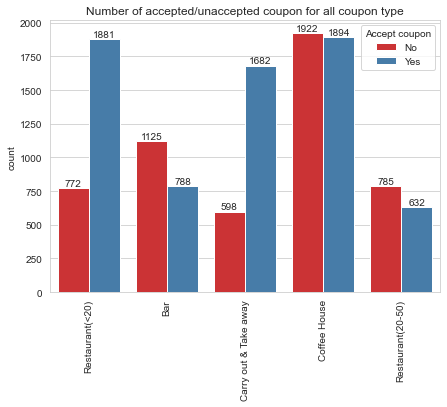

In [20]:
xtick_order = ['Restaurant(<20)','Bar','Carry out & Take away','Coffee House','Restaurant(20-50)'] # Sequence entire graph with this ticks order
plt.subplots(figsize = (7,5))
plot_coupon(df_clean,'coupon',order = xtick_order,rotation = 90,title = 'Number of accepted/unaccepted coupon for all coupon type')

There are 8 features for plotting the relation between count and feature. So, we use subplot from matplotlib to define the plotting region and fill it with countplot. 

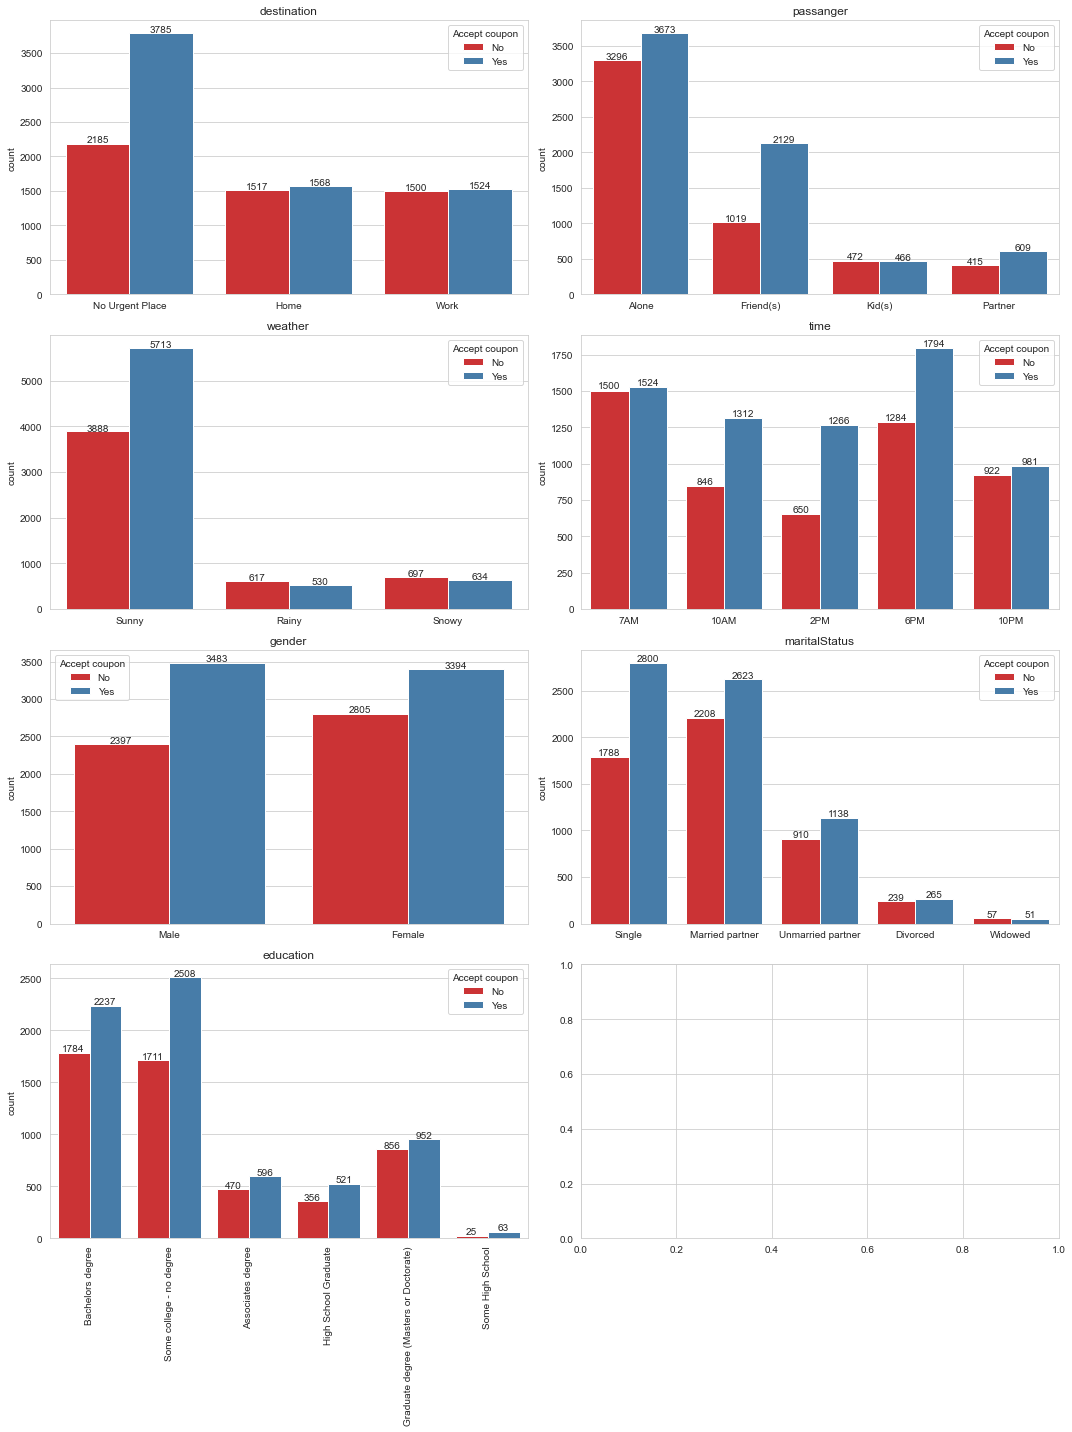

In [21]:
#Define plotting region (4rows, 2columns)
fig, axes = plt.subplots(4,2,figsize = (15,20))

#Plot graph between feature vs accepted coupon
plot_coupon(df_clean,'destination',axes[0][0])
plot_coupon(df_clean,'passanger',axes[0][1])
plot_coupon(df_clean,'weather',axes[1][0])

order_time = ['7AM', '10AM','2PM','6PM','10PM'] #Use for ordering the xtick in the graph
plot_coupon(df_clean,'time',axes[1][1],order_time)

plot_coupon(df_clean,'gender',axes[2][0])
plot_coupon(df_clean,'maritalStatus',axes[2][1])
plot_coupon(df_clean,'education',axes[3][0],rotation = 90) #Overlapping of the xtick : rotate the xtick

plt.tight_layout() #Avoid overlapping of each graph

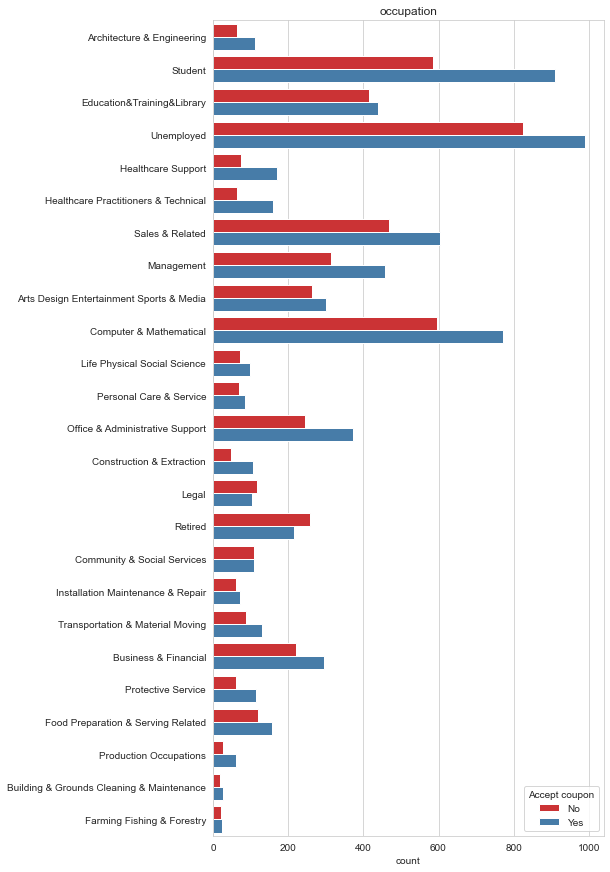

In [22]:
fig2, axes2 = plt.subplots(figsize = (7,15)) #Define size of graph for suitable format 
occupation_plot = sns.countplot(y = 'occupation',hue = 'Y',data = df_clean)
occupation_plot.legend(labels = ['No','Yes'],title = 'Accept coupon')
occupation_plot.set(ylabel = None)
occupation_plot.set(title = 'occupation');

From exploring the 1$^{st}$ categorical part of dataset, we can extract the most accepted coupon rate from graph.
- destination feature : No urgent place.
- passanger feature : Friend(s)
- weather feature : Sunny
- time feature : period 10AM - 6PM
- gender feature : Male accept coupon rate equal to female
- maritialStatus feature : Single
- educatioin : Some college - no degree
- occupation : Student

The second part of categorical analysis is analyzing relation between coupon type and extracted information from the first part. We use subplot that is exactly the same as previous part and fill the subplot with countplot for exploring the data.

In [23]:
def plot_coupon_type(column,value,title,ax = None):
    """ plot_coupon_type function is used for plotting countplot(seaborn) between accepted coupon type and feature
    
        parameter
        ---------
        column : selected column used in the graph
        value : extracted data in the column
        ax : axes that indicate the position in subplot (default = None)
        title : title of the graph
    """
    plot = sns.countplot(x = 'coupon',order = xtick_order,data = df_clean[(df_clean['Y'] == 1)&(df_clean[column] == value)],palette = sns.color_palette("Pastel1"),ax = ax)
    for p in plot.patches:
         plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+5),ha = 'center')
    plot.set(xlabel = None)
    plot.set_title(title)

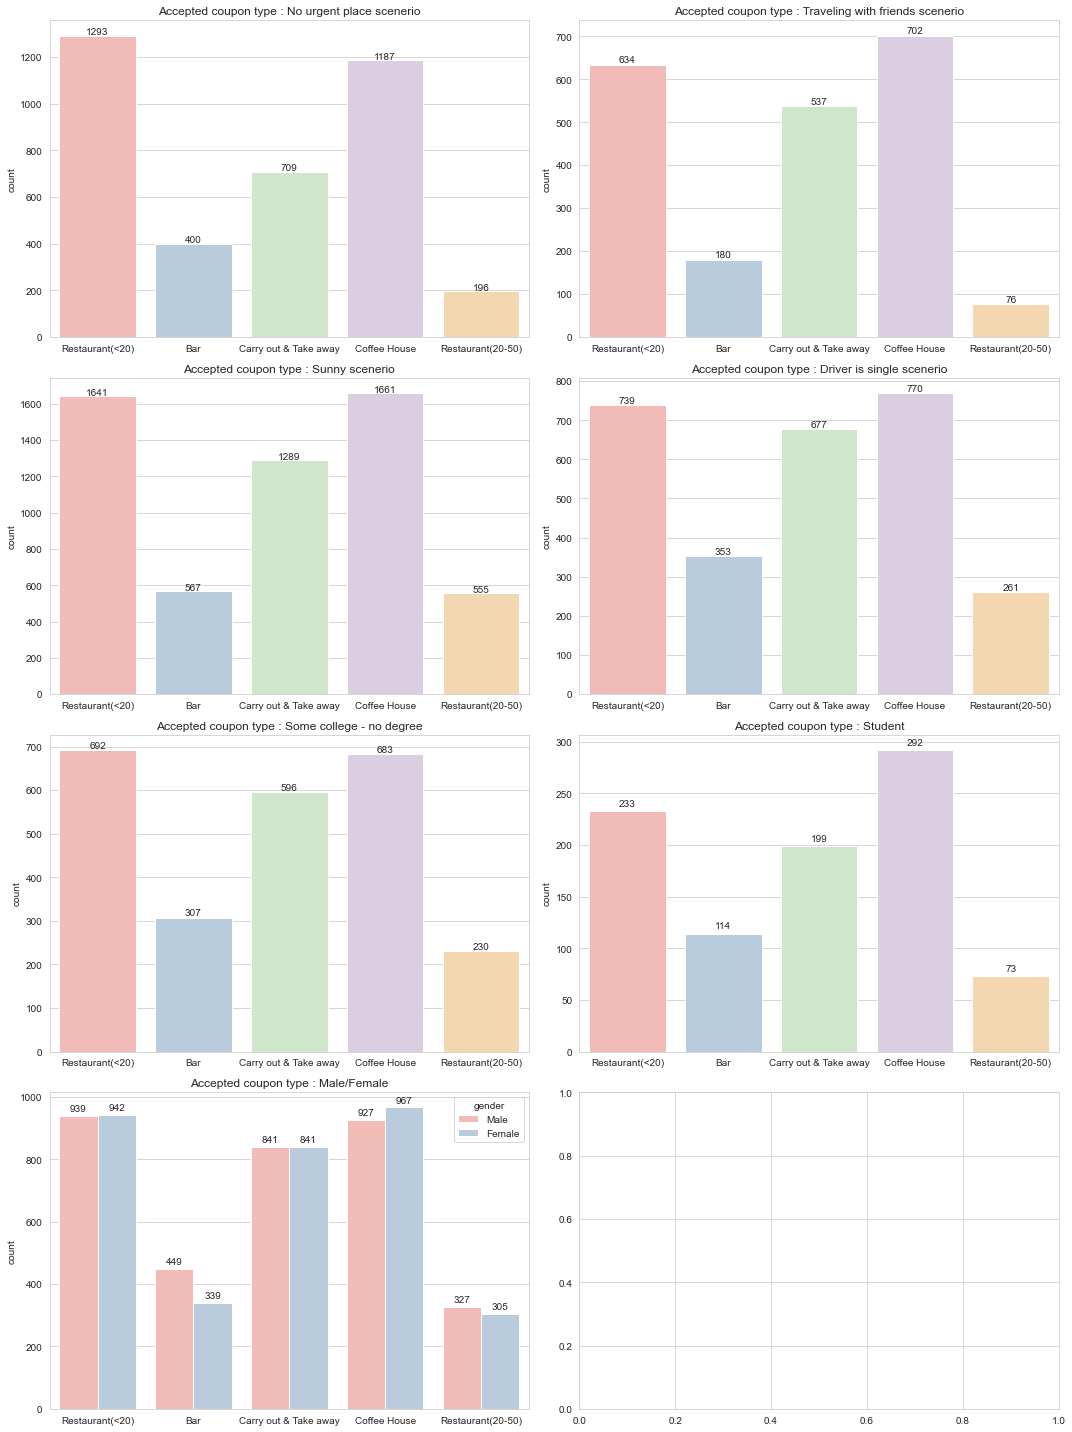

In [24]:
#define plotting region (4rows, 2columns)
fig3, axes3 = plt.subplots(4,2,figsize = (15,20))

#Countplot for each scenario
plot_coupon_type('destination','No Urgent Place',title = 'Accepted coupon type : No urgent place scenerio',ax = axes3[0][0])
plot_coupon_type('passanger','Friend(s)',title = 'Accepted coupon type : Traveling with friends scenerio',ax = axes3[0][1])
plot_coupon_type('weather','Sunny',title = 'Accepted coupon type : Sunny scenerio',ax = axes3[1][0])
plot_coupon_type('maritalStatus','Single',title = 'Accepted coupon type : Driver is single scenerio',ax = axes3[1][1])
plot_coupon_type('education','Some college - no degree',title = 'Accepted coupon type : Some college - no degree',ax = axes3[2][0])
plot_coupon_type('occupation','Student',title = 'Accepted coupon type : Student',ax = axes3[2][1])

#Count plot with accepted coupon and gender
gender_coupon_type = sns.countplot(x = 'coupon',order = xtick_order,hue = 'gender',data = accept_coupon_df,palette = sns.color_palette("Pastel1"),ax = axes3[3][0])
for p in gender_coupon_type.patches:
        gender_coupon_type.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+15),ha = 'center')
gender_coupon_type.set(xlabel = None)
gender_coupon_type.set_title('Accepted coupon type : Male/Female')

plt.tight_layout()

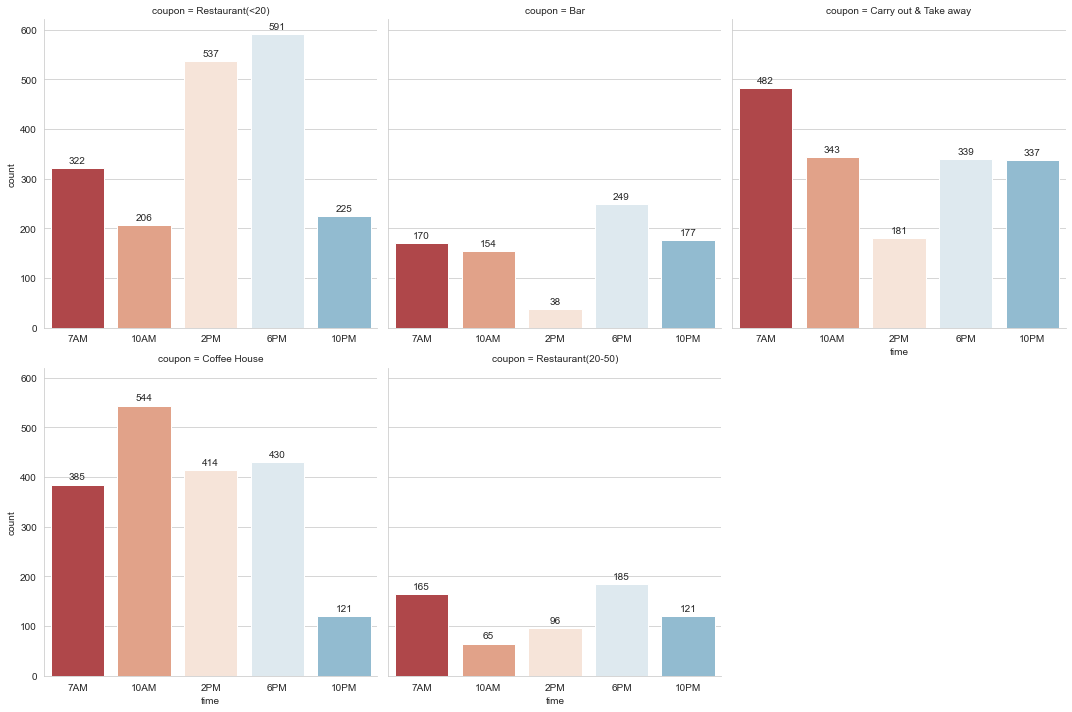

In [25]:
#Count plot with accepted coupon and time
time_coupon_type = sns.catplot(x = 'time',kind = 'count',order = ['7AM','10AM','2PM','6PM','10PM'],col = 'coupon',sharex = False,col_wrap = 3,data = accept_coupon_df,palette = sns.color_palette("RdBu"))
for ax in time_coupon_type.axes.ravel(): #iteration over facet grid (seaborn)
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+10),ha = 'center')

From exploring the 2$^{nd}$ categorical part of dataset, we can extract the most accepted coupon type from the graph. All scenerio are accepted coupon and the result display below.

In [26]:
#Extract and print top 3 accepted coupon type from each scenario
dict_extract = {
    'destination' : 'No Urgent Place',
    'passanger' : 'Friend(s)',
    'weather' : 'Sunny',
    'maritalStatus' : 'Single',
    'education' : 'Some college - no degree',
    'occupation' : 'Student'
}
for key, value in dict_extract.items():
    print(f'{key} = {value} scenario')
    print(pd.DataFrame(accept_coupon_df[accept_coupon_df[key] == value]['coupon'].value_counts().head(3)))
    print('-----------------------------------')
gender = ['Male', 'Female']
for value in gender:
    print(f'gender = {value} scenario')
    print(pd.DataFrame(accept_coupon_df[accept_coupon_df['gender'] == value]['coupon'].value_counts().head(3)))
    print('-----------------------------------')

destination = No Urgent Place scenario
                       coupon
Restaurant(<20)          1293
Coffee House             1187
Carry out & Take away     709
-----------------------------------
passanger = Friend(s) scenario
                       coupon
Coffee House              702
Restaurant(<20)           634
Carry out & Take away     537
-----------------------------------
weather = Sunny scenario
                       coupon
Coffee House             1661
Restaurant(<20)          1641
Carry out & Take away    1289
-----------------------------------
maritalStatus = Single scenario
                       coupon
Coffee House              770
Restaurant(<20)           739
Carry out & Take away     677
-----------------------------------
education = Some college - no degree scenario
                       coupon
Restaurant(<20)           692
Coffee House              683
Carry out & Take away     596
-----------------------------------
occupation = Student scenario
                 

The Restaurant(<20), Coffee House and Carry out & take away coupon is top 3 accepted coupon type among all scenerio. 

For extracted data from time series, we can conclude separately between coupon type. This information contain the best period and the worst period for providing coupon.
- Restaurant(<20) : The best period is 2PM - 6PM.
- Bar : The worst time is 2PM.
- Carry out & Take away : The best time is at 7AM. The worst time is at 2PM.
- Coffee House : The worst time is at 10PM.
- Restaurant(20-50) :The best time is at 6PM. The worst time is at 10AM.

## Key finding

### 1. What are top numerical features affected to accepted coupon?

Top 3 numerical features that affect to accepted coupon are coupon expiration, coffee house frequency and distant between current location and using coupon shop. 

### 2. What type of people tend to accept coupon?

- Gender : Male accept coupon equally to female.
- Marital Status: Single driver trend to accept coupon more than the other.
- Educatioin : The most accepted coupon was people in some college - no degree.
- Occupation : The most accepted coupon was student

### 3. What kind of behavior will affect to accepted coupon?

- The driver has no destination.
- Passenger in the car is friends. 
- The weather is sunny.
- The period is 10AM - 6PM.

### 4. What type of coupon is the most popular?

- Restaurant(<20) and Coffee House coupon are the most popular coupon type.

### 5. How environment/behavior affect to type of accepted coupon?
- Behavior and environment don't affect to type of accepted coupon that much.
- Time is the most affect to type of accepted coupon.


## Recommendation
This dataset has a lot of feature (26 features). In data exploration, the result from visualization can only extract the information from feature separately. 
1. we can improve the amount of accepted coupon by following the information extracted from data visualization.
2. This dataset is more suitable for modeling because of complexing of the data. The suitable model for this dataset is classification models (e.g., logistic regression, decision tree and neural network).
3. Prediction from the model can provide financial benefit more clearly that using only data visualization.